In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# convolve

In [2]:
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

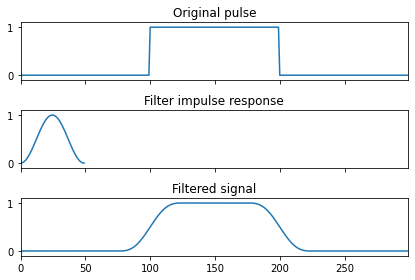

In [3]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()

# correlate

In [4]:
rng = np.random.default_rng()

### Implement a matched filter using cross-correlation, to recover a signal that has passed through a noisy channel.

In [6]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

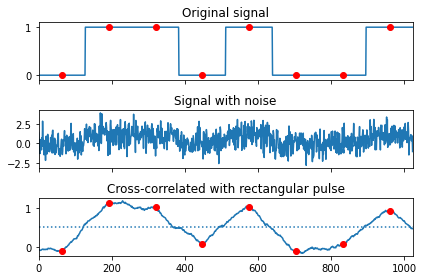

In [7]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()

### Compute the cross-correlation of a noisy signal with the original signal.

In [8]:
x = np.arange(128) / 128
sig = np.sin(2 * np.pi * x)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, sig)
lags = signal.correlation_lags(len(sig), len(sig_noise))
corr /= np.max(corr)

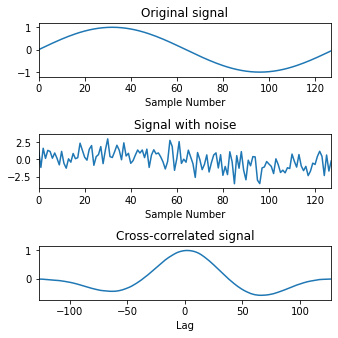

In [9]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(sig)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()

# fftconvolve
Convolve two N-dimensional arrays using FFT.

Convolve in1 and in2 using the fast Fourier transform method, with the output size determined by the mode argument.

### Autocorrelation of white noise is an impulse.

In [10]:
sig = rng.standard_normal(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

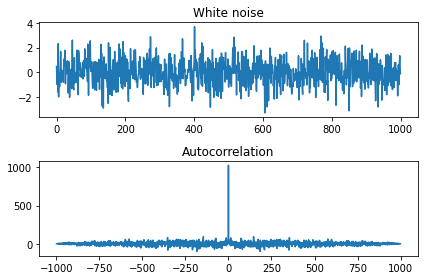

In [11]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()

### Gaussian blur implemented using FFT convolution. Notice the dark borders around the image, due to the zero-padding beyond its boundaries. The convolve2d function allows for other types of image boundaries, but is far slower.

In [14]:
from scipy import misc
face = misc.face(gray=True)
kernel = np.outer(signal.windows.gaussian(70, 8),
                  signal.windows.gaussian(70, 8))
blurred = signal.fftconvolve(face, kernel, mode='same')

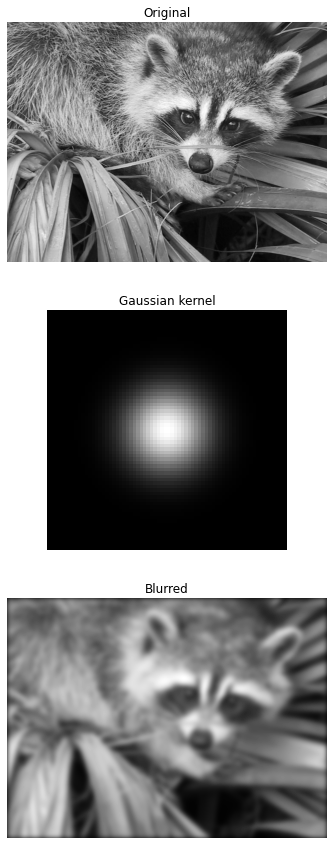

In [15]:
fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Gaussian kernel')
ax_kernel.set_axis_off()
ax_blurred.imshow(blurred, cmap='gray')
ax_blurred.set_title('Blurred')
ax_blurred.set_axis_off()

# oaconvolve
Convolve two N-dimensional arrays using the overlap-add method.

Convolve in1 and in2 using the overlap-add method, with the output size determined by the mode argument.

### Convolve a 100,000 sample signal with a 512-sample filter.

In [16]:
filt = signal.firwin(512, 0.01)
fsig = signal.oaconvolve(sig, filt)

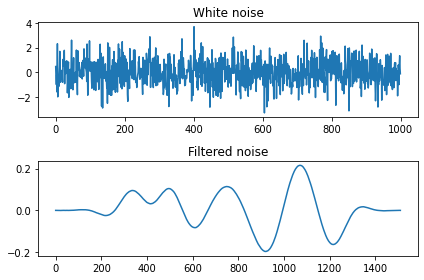

In [17]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')
ax_mag.plot(fsig)
ax_mag.set_title('Filtered noise')
fig.tight_layout()

# convolve2d
Convolve two 2-dimensional arrays.

Convolve in1 and in2 with output size determined by mode, and boundary conditions determined by boundary and fillvalue.

In [18]:
ascent = misc.ascent()
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

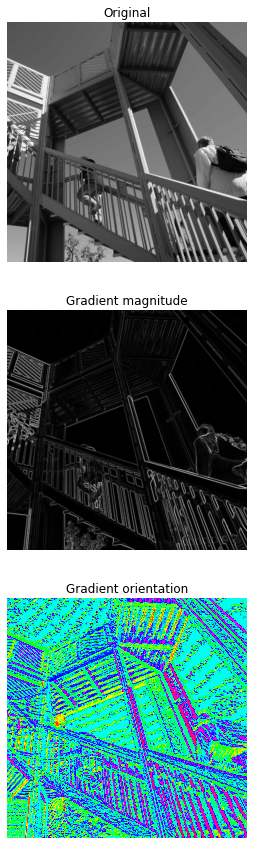

In [19]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()

# correlate2d
Cross-correlate two 2-dimensional arrays.

Cross correlate in1 and in2 with output size determined by mode, and boundary conditions determined by boundary and fillvalue.

### Use 2D cross-correlation to find the location of a template in a noisy image:

In [20]:
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + rng.standard_normal(face.shape) * 50  # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

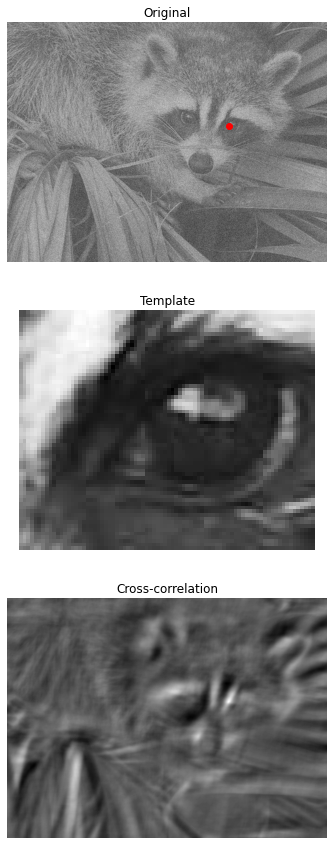

In [21]:
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')

# sepfir2d

# choose_conv_method
Find the fastest convolution/correlation method.

This primarily exists to be called during the method='auto' option in convolve and correlate. It can also be used to determine the value of method for many different convolutions of the same dtype/shape. In addition, it supports timing the convolution to adapt the value of method to a particular set of inputs and/or hardware.

In [22]:
img = rng.random((32, 32))
filter = rng.random((8, 8))
method = signal.choose_conv_method(img, filter, mode='same')
method

'fft'

In [23]:
img2 = rng.random((32, 32))
filter2 = rng.random((8, 8))
corr2 = signal.correlate(img2, filter2, mode='same', method=method)
conv2 = signal.convolve(img2, filter2, mode='same', method=method)

# correlation_lags
Calculates the lag / displacement indices array for 1D cross-correlation.



### Cross-correlation of a signal with its time-delayed self.

In [24]:
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]